<a href="https://colab.research.google.com/github/ivancarhuapoma/Projects/blob/main/Pandas_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

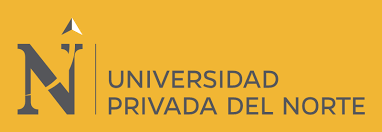



**Análisis de Datos - Parte 1**

Alumno: Carhuapoma Mezarina Ivan Santos

In [ ]:
#Importacion de librerias conocidas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**READ()**

Para leer un DataFrame desde un archivo csv utilizar la siguiente sintáxis:

> *pd.read_csv('NombbreCSV')*


In [ ]:
#Leectura de archivo 
df= pd.read_csv('/content/sample_data/pokemon_data.csv')
df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [ ]:
#Identificar el tipo de dato de df
type(df)

pandas.core.frame.DataFrame

**ACCESO A FILAS DEL DATAFRAME**

Para acceder a una fila del Dataframe utilizar la siguiente sintáxis:


> *NombreDataFrame[#indiceInicial: #indiceFinal]*


El resultado será las filas del Dataframe desde ***#indiciInicial*** hasta ***#indiceFinal-1***

In [ ]:
df[0:0]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary


In [ ]:
df[3:5]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [ ]:
df[0:3]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False


In [ ]:
df[5:]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


**ACCESO A LAS COLUMNAS DE UN DATAFRAME**

Para acceder a una columna de un Dataframe utilizar la siguiente sintaxis:

> *NombreDataFrame[NombreColumna]*

In [ ]:
df['Name']

0                  Bulbasaur
1                    Ivysaur
2                   Venusaur
3      VenusaurMega Venusaur
4                 Charmander
               ...          
795                  Diancie
796      DiancieMega Diancie
797      HoopaHoopa Confined
798       HoopaHoopa Unbound
799                Volcanion
Name: Name, Length: 800, dtype: object

**ACCESO A ELEMENTOS: iLOC**

Se puede acceder a los elementos de un Dataframe utilizando la funcion iloc en la siguiente sintáxis:

> *NombreDataFrame.iloc[IndiceFila, IndiceColumna]*

Tener en cuenta que ***IndiceFila*** empieza en ***0***, mientras que ***IndiceColumna*** empieza en ***1***.

In [ ]:
df.iloc[10,1]

'Wartortle'

In [ ]:
df.iloc[0]

#                     1
Name          Bulbasaur
Type 1            Grass
Type 2           Poison
HP                   45
Attack               49
Defense              49
Sp. Atk              65
Sp. Def              65
Speed                45
Generation            1
Legendary         False
Name: 0, dtype: object

Se puede acceder a un Dataframe haciendo consultas. El resultado de una consulta será una serie de índices y booleanos que cumplen o no una condición.

In [ ]:
#Filtrar a los pokemones cuyo poder de ataque sea mayor que 80

df['Attack']>80

0      False
1      False
2       True
3       True
4      False
       ...  
795     True
796     True
797     True
798     True
799     True
Name: Attack, Length: 800, dtype: bool

In [ ]:
#Asignacion de los pokemones con ataque mayor que 80 a la variable df_AtaqueMayor80
df_AtaqueMayor80= df['Attack']>80
df_AtaqueMayor80

0      False
1      False
2       True
3       True
4      False
       ...  
795     True
796     True
797     True
798     True
799     True
Name: Attack, Length: 800, dtype: bool

In [ ]:
type(df_AtaqueMayor80)

pandas.core.series.Series

Si se desea obtener **la misma estructura** del Dataframe cuyas filas cumplen la condición entonces se debe utilizar la función **where**. Tener en cuenta que las filas del Dataframe que **no cumplen con la condición** tendrá el valor de **NaN** en todas sus columnas; sin embargo estas filas no serán contabilizadas al momento de ejecutar las funciones estadísticas.

In [ ]:
#df.where(df['Attack']>80)
#Asignacion de los pokemones con mas de 80 de ataque a la variable df_AtaqueMayor80
df_AtaqueMayor80 =df.where(df['Attack']>80)
df_AtaqueMayor80

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Venusaur,Grass,Poison,80.0,82.0,83.0,100.0,100.0,80.0,1.0,0.0
3,3.0,VenusaurMega Venusaur,Grass,Poison,80.0,100.0,123.0,122.0,120.0,80.0,1.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719.0,Diancie,Rock,Fairy,50.0,100.0,150.0,100.0,150.0,50.0,6.0,1.0
796,719.0,DiancieMega Diancie,Rock,Fairy,50.0,160.0,110.0,160.0,110.0,110.0,6.0,1.0
797,720.0,HoopaHoopa Confined,Psychic,Ghost,80.0,110.0,60.0,150.0,130.0,70.0,6.0,1.0
798,720.0,HoopaHoopa Unbound,Psychic,Dark,80.0,160.0,60.0,170.0,130.0,80.0,6.0,1.0


In [ ]:
#Contabilizar dataframe 
df['Attack'].count()

800

In [ ]:
#Contabilizacion de dataframe el cual ya se filtro
df_AtaqueMayor80['Attack'].count()

341

Si se desea borrar estas filas que no tienen valores se puede utilizar la función **dropna**. Otra opción es **pasar la condición como parámetro del mismo Dataframe**.

In [ ]:
#Eliminar las filas con valores NAN en todas sus columnas
df_AtaqueMayor80.dropna()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
2,3.0,Venusaur,Grass,Poison,80.0,82.0,83.0,100.0,100.0,80.0,1.0,0.0
3,3.0,VenusaurMega Venusaur,Grass,Poison,80.0,100.0,123.0,122.0,120.0,80.0,1.0,0.0
6,6.0,Charizard,Fire,Flying,78.0,84.0,78.0,109.0,85.0,100.0,1.0,0.0
7,6.0,CharizardMega Charizard X,Fire,Dragon,78.0,130.0,111.0,130.0,85.0,100.0,1.0,0.0
8,6.0,CharizardMega Charizard Y,Fire,Flying,78.0,104.0,78.0,159.0,115.0,100.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719.0,Diancie,Rock,Fairy,50.0,100.0,150.0,100.0,150.0,50.0,6.0,1.0
796,719.0,DiancieMega Diancie,Rock,Fairy,50.0,160.0,110.0,160.0,110.0,110.0,6.0,1.0
797,720.0,HoopaHoopa Confined,Psychic,Ghost,80.0,110.0,60.0,150.0,130.0,70.0,6.0,1.0
798,720.0,HoopaHoopa Unbound,Psychic,Dark,80.0,160.0,60.0,170.0,130.0,80.0,6.0,1.0


In [ ]:
#ojo, dropns solo borra los registros en tiempo de ejecucion 
df_AtaqueMayor80.dropna()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
2,3.0,Venusaur,Grass,Poison,80.0,82.0,83.0,100.0,100.0,80.0,1.0,0.0
3,3.0,VenusaurMega Venusaur,Grass,Poison,80.0,100.0,123.0,122.0,120.0,80.0,1.0,0.0
6,6.0,Charizard,Fire,Flying,78.0,84.0,78.0,109.0,85.0,100.0,1.0,0.0
7,6.0,CharizardMega Charizard X,Fire,Dragon,78.0,130.0,111.0,130.0,85.0,100.0,1.0,0.0
8,6.0,CharizardMega Charizard Y,Fire,Flying,78.0,104.0,78.0,159.0,115.0,100.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719.0,Diancie,Rock,Fairy,50.0,100.0,150.0,100.0,150.0,50.0,6.0,1.0
796,719.0,DiancieMega Diancie,Rock,Fairy,50.0,160.0,110.0,160.0,110.0,110.0,6.0,1.0
797,720.0,HoopaHoopa Confined,Psychic,Ghost,80.0,110.0,60.0,150.0,130.0,70.0,6.0,1.0
798,720.0,HoopaHoopa Unbound,Psychic,Dark,80.0,160.0,60.0,170.0,130.0,80.0,6.0,1.0


In [ ]:
#Reasignamos a la misma variable
df_AtaqueMayor80=df_AtaqueMayor80.dropna()
df_AtaqueMayor80

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
2,3.0,Venusaur,Grass,Poison,80.0,82.0,83.0,100.0,100.0,80.0,1.0,0.0
3,3.0,VenusaurMega Venusaur,Grass,Poison,80.0,100.0,123.0,122.0,120.0,80.0,1.0,0.0
6,6.0,Charizard,Fire,Flying,78.0,84.0,78.0,109.0,85.0,100.0,1.0,0.0
7,6.0,CharizardMega Charizard X,Fire,Dragon,78.0,130.0,111.0,130.0,85.0,100.0,1.0,0.0
8,6.0,CharizardMega Charizard Y,Fire,Flying,78.0,104.0,78.0,159.0,115.0,100.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719.0,Diancie,Rock,Fairy,50.0,100.0,150.0,100.0,150.0,50.0,6.0,1.0
796,719.0,DiancieMega Diancie,Rock,Fairy,50.0,160.0,110.0,160.0,110.0,110.0,6.0,1.0
797,720.0,HoopaHoopa Confined,Psychic,Ghost,80.0,110.0,60.0,150.0,130.0,70.0,6.0,1.0
798,720.0,HoopaHoopa Unbound,Psychic,Dark,80.0,160.0,60.0,170.0,130.0,80.0,6.0,1.0


In [ ]:
#Pasar la condicion como parametro del dataframe principal
df[df['Attack']>80]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


Se puede escribir sintaxis mas complejas utilizando operadores como **or ('|')** o **and ('&')**

In [ ]:
#Filtrar a los pokemones cuyo puntaje de ataque sea mayor que 80 o sean de tipo 1 Grass
df[(df['Attack']>80) | (df['Type 1']=='Grass')]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [ ]:
df[(df['Attack']>80) & (df['Type 1']=='Grass')]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
76,70,Weepinbell,Grass,Poison,65,90,50,85,45,55,1,False
77,71,Victreebel,Grass,Poison,80,105,65,100,70,70,1,False
111,103,Exeggutor,Grass,Psychic,95,95,85,125,65,55,1,False
168,154,Meganium,Grass,NaN,80,82,100,83,100,80,2,False
274,254,Sceptile,Grass,NaN,70,85,65,105,85,120,3,False
275,254,SceptileMega Sceptile,Grass,Dragon,70,110,75,145,85,145,3,False
298,275,Shiftry,Grass,Dark,90,100,60,90,60,80,3,False
310,286,Breloom,Grass,Fighting,60,130,80,60,60,70,3,False


Se puede escribir funciones mas complejas utilizando operadores string **str.contains()**

In [ ]:
#Listar los nombres que tengan la frase 'chu'
df[df['Name'].str.contains('chu')]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
30,25,Pikachu,Electric,NaN,35,55,40,50,50,90,1,False
31,26,Raichu,Electric,NaN,60,90,55,90,80,110,1,False
186,172,Pichu,Electric,NaN,20,40,15,35,35,60,2,False
257,238,Smoochum,Ice,Psychic,45,30,15,85,65,65,2,False


Para negar una condicion de un Dataframe se puede utilizar el caracter **~** antes de la condición.

**ARITMÉTICA EN DATAFRAMES**

Para sumar los elementos de una columna del Dataframe utilizar la función **SUM** con la siguiente sintaxis:

> *SUM(NombreDataFrame[NombreColumna])*

In [ ]:
#Sumar la suma total de los poderes de ataques de los pokemones
sum(df['Attack'])

63201

In [ ]:
#Calcular la diferencia de las suma de los ataques y defensas(lo asignamos si queremos)
diff = sum(df['Attack']) - sum(df['Defense'])
diff

4127

Para obtener el promedio de los elementos de una columna puede utilizar la función **mean** de la librería **numpy**.

In [ ]:
#Promedio de los poderes de ataques de los pokemones
np.mean(df['Attack'])

79.00125

Puede obtener estadísticas de los campos de un Dataframe con la función **describe()**. La sintaxis es la siguiente:

> *NombreDataframe.describe()*

**HEAD / TAIL**


Para mostrar los primeros o últimos elementos de un Dataframe se puede utilizar las funcione **HEAD** o **TAIL**, previamente importada la librería **pandas**. La sintaxis es como sigue:

> *import pandas as pd*

> *NombreDataframe.head()*

> *NombreDataframe.tail()*


In [ ]:
#Listar los 10 primeros pokemones del dataframe
df.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


In [ ]:
#Listar los 10 ultimos pokemones registrados
df.tail(10)

**SORT_VALUES**

Permite ordenar un dataframe a partir de una columna utilizando la siguiente sintaxis:

> *NombreDataFrame.sort_values('NombreColumna',ascending=[True,False])*

In [ ]:
#Ordenar los pokemones por nombre
df.sort_values('Name')

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
510,460,Abomasnow,Grass,Ice,90,92,75,92,85,60,4,False
511,460,AbomasnowMega Abomasnow,Grass,Ice,90,132,105,132,105,30,4,False
68,63,Abra,Psychic,NaN,25,20,15,105,55,90,1,False
392,359,Absol,Dark,NaN,65,130,60,75,60,75,3,False
393,359,AbsolMega Absol,Dark,NaN,65,150,60,115,60,115,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
632,571,Zoroark,Dark,NaN,60,105,60,120,60,105,5,False
631,570,Zorua,Dark,NaN,40,65,40,80,40,65,5,False
46,41,Zubat,Poison,Flying,40,45,35,30,40,55,1,False
695,634,Zweilous,Dark,Dragon,72,85,70,65,70,58,5,False


**RESET_INDEX**

El resultado anterior ha desordenado los índices del DataFrame. Para actualizar el índice de un DataFrame usar la función reset_index() con la siguiente sintaxis:

> *NombreDataFrame.reset_index()*

In [ ]:
#Reseteo del indice
df.sort_values('Name').reset_index()

,index,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,510,460,Abomasnow,Grass,Ice,90,92,75,92,85,60,4,False
1,511,460,AbomasnowMega Abomasnow,Grass,Ice,90,132,105,132,105,30,4,False
2,68,63,Abra,Psychic,NaN,25,20,15,105,55,90,1,False
3,392,359,Absol,Dark,NaN,65,130,60,75,60,75,3,False
4,393,359,AbsolMega Absol,Dark,NaN,65,150,60,115,60,115,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,632,571,Zoroark,Dark,NaN,60,105,60,120,60,105,5,False
796,631,570,Zorua,Dark,NaN,40,65,40,80,40,65,5,False
797,46,41,Zubat,Poison,Flying,40,45,35,30,40,55,1,False
798,695,634,Zweilous,Dark,Dragon,72,85,70,65,70,58,5,False


**SERIES**

La serie es un arreglo unidimensional capaz de almacenar datos de diferentes tipos.

Una serie puede ser creada usando valores de entrada como: arreglo, diccionario, valor escalar o constante.

Para crear una serie usar la sintaxis:

> *pandas.Series(data, index, dtype, copye)*

Donde :

> ***data:*** toma varias formas como arreglo, lista, constante.

> ***index:*** es el tamaño del arreglo - 1, inicializado en cero.

> ***dtype:*** para identificar los tipos de datos.

> ***copye:*** para copiar los datos, por defecto está en *FALSE*.

Ejemplo:

Crear una serie con la columna *Name* del dataframe de Pokemon. La información que se muestra en una serie es su índice y los valores que la conforman.

In [ ]:
serieprueba = pd.Series(df['Name'])
serieprueba

0                  Bulbasaur
1                    Ivysaur
2                   Venusaur
3      VenusaurMega Venusaur
4                 Charmander
               ...          
795                  Diancie
796      DiancieMega Diancie
797      HoopaHoopa Confined
798       HoopaHoopa Unbound
799                Volcanion
Name: Name, Length: 800, dtype: object

In [ ]:
#Comprovamos el tipo de dato
type(serieprueba)

pandas.core.series.Series

**VALUE_COUNTS**

Si se desea hallar la cantidad de cada valor de una columna se puede utilizar la funcion **value_counts()**. 

La función value_counts() devuelve una serie de números enteros con la cantidad de valores repetidos en una columna y coloca como índice los elementos agrupados. La sintaxis es como sigue:

> *NombreDataframe['NombreColumna'].value_counts()*

In [ ]:
#Listar la cantidad de pokemones legendarios o no
SerieLegendary = df['Legendary'].value_counts()
SerieLegendary

False    735
True      65
Name: Legendary, dtype: int64

In [ ]:
type(SerieLegendary)

pandas.core.series.Series

Puede mostrar los índices de una serie utilzando la función ***index*** en la siguiente sintaxis:

> *NombreSerie.index*

In [ ]:
SerieLegendary.index

Index([False, True], dtype='object')

Puede mostrar los valores de una serie utilizando la función ***values*** en la siguiente sintaxis:

> *NombreSerie.values*

In [ ]:
SerieLegendary.values

array([735,  65])

Se puede crear un Dataframe a partir de series. Por ejemplo podría crear el dataframe denoimnado prueba con las series anteriores creadas

In [ ]:
df_nuevo = pd.DataFrame()

In [ ]:
df_nuevo['Legendary'] = pd.Series(SerieLegendary.index)
df_nuevo['Cantidad'] = pd.Series(SerieLegendary.values)


In [ ]:
df_nuevo.sort_values('Cantidad')

,Legendary,Cantidad
1,True,65
0,False,735


In [ ]:
df_nuevo  =df_nuevo.sort_values('Cantidad').reset_index()
df_nuevo

,index,Legendary,Cantidad
0,1,True,65
1,0,False,735


**SAMPLE**

Permite mostrar aleatoriamente una cantidad de registros prorporcionados por el usuario. La sintaxis es la siguiente:

> *NombreDataframe.sample(N)*

Donde ***N*** es la cantidad de registros aleatorios que se mostrará.

In [ ]:
#Mostrar aleatoriamente 10 pokemones
df.sample(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
214,199,Slowking,Water,Psychic,95,75,80,100,110,30,2,False
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False
127,118,Goldeen,Water,NaN,45,67,60,35,50,63,1,False
594,534,Conkeldurr,Fighting,NaN,105,140,95,55,65,45,5,False
577,518,Musharna,Psychic,NaN,116,55,85,107,95,29,5,False
241,223,Remoraid,Water,NaN,35,65,35,65,35,65,2,False
428,386,DeoxysNormal Forme,Psychic,NaN,50,150,50,150,50,150,3,True
190,176,Togetic,Fairy,Flying,55,40,85,80,105,40,2,False
289,266,Silcoon,Bug,NaN,50,35,55,25,25,15,3,False
131,122,Mr. Mime,Psychic,Fairy,40,45,65,100,120,90,1,False


In [ ]:
#Definir una función en Python
def obtiene_cantidad_tipo(df,tipoPokemon):
  cantidad_tipos_pokemon=df[tipoPokemon].value_counts()
  tipos_pokemon_df= pd.DataFrame()
  tipos_pokemon_df[tipoPokemon] = pd.Series(cantidad_tipos_pokemon.index)
  tipos_pokemon_df['Cantidad'] = pd.Series(cantidad_tipos_pokemon.values)
  tipos_pokemon_df= tipos_pokemon_df.sort_values(tipoPokemon).reset_index(drop=True)
  return tipos_pokemon_df

**¿Qué tipo de pokemon tienen la mayor cantidad de pokemones?**

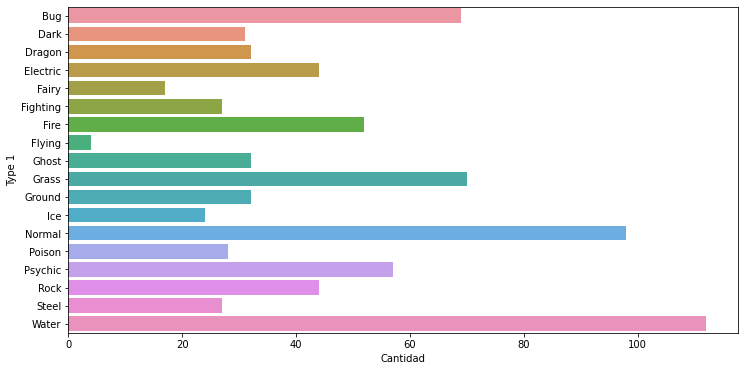

In [ ]:
tipo1_pokemon_df = obtiene_cantidad_tipo(df, "Type 1")
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
sns.barplot(y= 'Type 1', x='Cantidad', data=tipo1_pokemon_df)

**¿Cuántos pokemones hay por cada generación?**

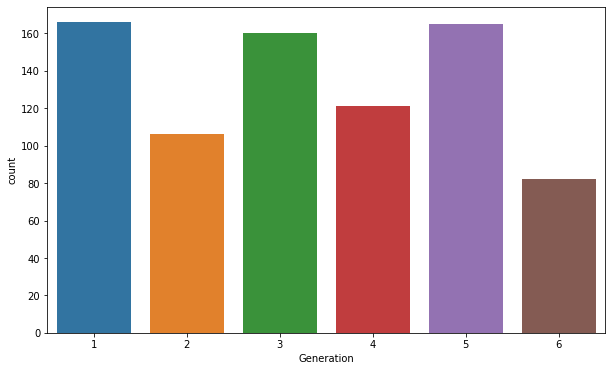

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
sns.countplot( x='Generation', data=df )